<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/ResNeXt-50_Transfer%20Learning_Covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14.0
!pip install git+https://github.com/keras-team/keras-applications/
!pip install keras==2.2.4

     |████████████████████████████████| 109.2MB 30kB/s 
     |████████████████████████████████| 491kB 54.0MB/s 
     |████████████████████████████████| 3.2MB 70.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Cloning https://github.com/keras-team/keras-applications/ to /tmp/pip-req-build-bu0nnoa5
  Running command git clone -q https://github.com/keras-team/keras-applications/ /tmp/pip-req-build-bu0nnoa5
  Created wheel for Keras-Applications: filename=Keras_Applications-1.0.8-cp36-none-any.whl size=62000 sha256=57d3c599b59cfe30fe64ae320e9a5632098dfc9351ffc99bcaeb611e368d78bc
  Stored in directory: /tmp/pip

In [0]:
import tensorflow as tf; print(tf.__version__)
import keras; print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
!unzip Covid_Data_GradientCrescent.zip

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:00, 169MB/s]
Archive:  Covid_Data_GradientCrescent.zip
replace all/test/covid/nejmoa2001191_f3-PA.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import numpy as np
import tensorflow as tf
DATASET_PATH = "/content/two/train"
test_dir = "/content/two/test"
IMAGE_SIZE = (150, 150)
NUM_CLASSES = len("79")
BATCH_SIZE = 10 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 50
LEARNING_RATE =0.0005 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode="constant")

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="binary",)

valid_batches = train_datagen.flow_from_directory(test_dir,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="binary",
 
 
 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [0]:
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [0]:
%%time
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/two/train', # this is where you specify the path to the main data folder
                                                 target_size=(150,150),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_batches = train_datagen.flow_from_directory('/content/two/test',
                                                   target_size=(150,150),
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
CPU times: user 8.54 ms, sys: 3.06 ms, total: 11.6 ms
Wall time: 206 ms


In [0]:
from keras_applications.resnext import ResNeXt50
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras import models
from keras import layers
from keras_applications.resnext import ResNeXt50
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet_pi
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

base_model = ResNeXt50(weights='imagenet', 
                       backend=keras.backend,
                       layers=keras.layers, 
                       models=keras.models, 
                       include_top=False,
                       utils=keras.utils, 
                       input_shape=(150, 150, 3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(1024,activation='relu')(x) #dense layer 3
preds=Dense(1,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model=Model(inputs=base_model.input,outputs=preds)
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 reshape_1
13 conv2_block1_2_reduce
14 reshape_2
15 conv2_block1_2_bn
16 conv2_block1_2_relu
17 conv2_block1_0_conv
18 conv2_block1_3_conv
19 conv2_block1_0_bn
20 conv2_block1_3_bn
21 conv2_block1_add
22 conv2_block1_out
23 conv2_block2_1_conv
24 conv2_block2_1_bn
25 conv2_block2_1_relu
26 conv2_block2_2_pad
27 conv2_block2_2_conv
28 reshape_3
29 conv2_block2_2_reduce
30 reshape_4
31 conv2_block2_2_bn
32 conv2_block2_2_relu
33 conv2_block2_3_conv
34 conv2_block2_3_bn
35 conv2_block2_add
36 conv2_block2_out
37 conv2_block3_1_conv
38 conv2_block3_1_bn
39 conv2_block3_1_relu
40 conv2_block3_2_pad
41 conv2_block3_2_conv
42 reshape_5
43 conv2_block3_2_reduce
44 reshape_6
45 conv2_block3_2_bn
46 conv2_block3_2_relu
47 conv2_block3_3_conv
48 conv2_block3_3_bn
49 conv2_block3_add
50 conv2_block3_out
51

In [0]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_size_valid = valid_batches.n//valid_batches.batch_size
step_size_train=train_generator.n//train_generator.batch_size
result=model.fit_generator(generator=train_generator,
                           validation_data = valid_batches,
                           validation_steps = step_size_valid,
                           steps_per_epoch=step_size_train,
                           epochs=50)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
4/4 [==============================] - 225s 56s/step - loss: 0.8903 - acc: 0.7344 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 2/50
4/4 [==============================] - 163s 41s/step - loss: 0.1435 - acc: 0.9751 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/50
4/4 [==============================] - 162s 41s/step - loss: 0.1550 - acc: 0.9503 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 4/50
4/4 [==============================] - 162s 41s/step - loss: 1.7008 - acc: 0.8897 - val_loss: 1.4461 - val_acc: 0.8333
Epoch 5/50
4/4 [==============================] - 164s 41s/step - loss: 0.7328 - acc: 0.8897 - val_loss: 0.0607 - val_acc: 0.9444
Epoch 6/50
4/4 [==============================] - 202s 50s/step - loss: 0.2457 - acc: 0.9141 - val_loss: 1.5503 - val_acc: 0.6667
Epoch 7/50
4/4 [==============================] - 163s 41s/step - loss: 0.1166 - acc: 0.9751 - val_loss: 0.0019 - val_acc

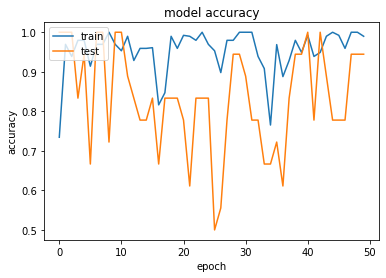

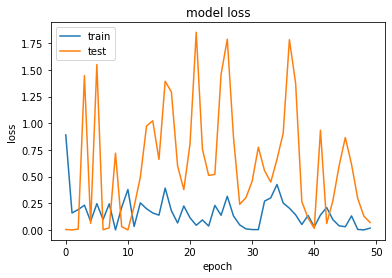

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()